Enter a industry name: RELI


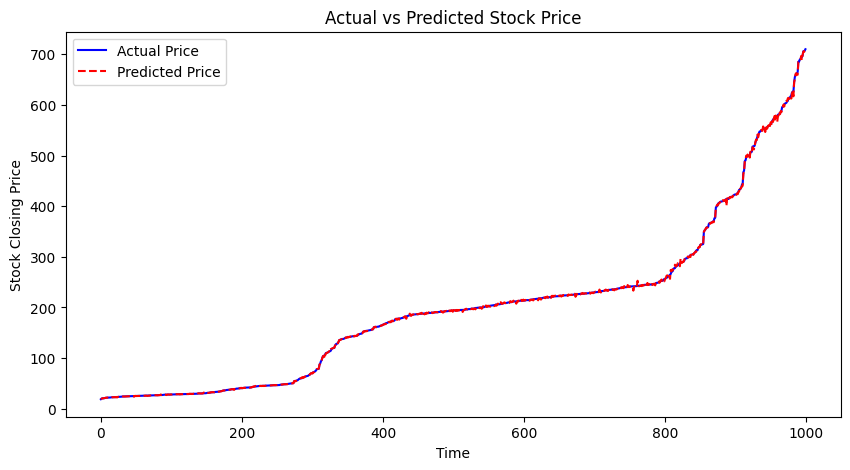

Model R² Score:0.9998930386599935


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

industry = input("Enter a industry name: ")
file_path = "./"+industry+".csv"
df=pd.read_csv(file_path)

df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

def clean_numeric(value):
    return float(value.replace(',','')) if isinstance(value,str) else value

numeric_cols=['Price','Open','High','Low']
for col in numeric_cols:
    df[col]=df[col].apply(clean_numeric)

def convert_volume(value):
    if isinstance(value,str):
        value=value.strip()
        if value.endswith('M'):
            return float(value[:-1])*1_000_000
        elif value.endswith('K'):
            return float(value[:-1])*1_000
        elif value.replace(',','').isdigit():
            return float(value.replace(',',''))
    return None

df['Vol.']=df['Vol.'].apply(convert_volume)

df.dropna(subset=numeric_cols+['Vol.'],inplace=True)

x=df[['Open','High','Low','Vol.']]
y=df['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
results_sorted=results.sort_values("Actual")

plt.figure(figsize=(10,5))
plt.plot(range(len(results_sorted)),results_sorted['Actual'],label="Actual Price",color='blue')
plt.plot(range(len(results_sorted)),results_sorted['Predicted'],label="Predicted Price",color='red',linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Actual vs Predicted Stock Price")
plt.legend()
plt.show()

print(f"Model R² Score:{regressor.score(X_test,y_test)}")